# Summary

This project revolves around the analysis of a dataset provided by a mining company, aimed at predicting the recovery of gold from gold ore. My goal is to develop and evaluate predictive models that accurately estimate the recovery rate of gold at various stages of the ore processing pipeline. By leveraging machine learning techniques, I aim to optimize the prediction accuracy and identify key factors influencing the gold recovery process. Through this analysis, I seek to provide insights and recommendations to enhance the efficiency and productivity of gold extraction operations.

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

In [2]:
# Load datasets

gold_train = pd.read_csv('/datasets/gold_recovery_train.csv')
gold_test = pd.read_csv('/datasets/gold_recovery_test.csv')
gold_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
display(gold_train.head())
print(gold_train.info())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [4]:
display(gold_test.head())
print(gold_test.info())

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [5]:
display(gold_full.head())
print(gold_full.info())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


There's missing values in almost every column of each dataset. The most null values in a column in the train dataset is around 2000, which makes me hesitant to just remove the rows with missing values but that's what I'm going to do. Please let me know if I should fill them in instead.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Yeah, you can remove the missing values
    
</div>

In [6]:
# Define a function to calculate recovery

def calculate_recovery(C, F, T):
    recovery = ((C * (F - T)) / (F * (C - T))) * 100
    recovery[recovery < 0] = np.nan  # Replace negative values with NaN
    return recovery

In [7]:
# Remove rows with missing values from the training dataset

gold_train = gold_train.dropna()

# Verify that missing values have been removed
print("Data missing values after removal:")
print(gold_train.isnull().sum())

Data missing values after removal:
date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64


In [8]:
# Calculate rougher output recovery using the provided formula for the training dataset

gold_train['recovery_calculated'] = calculate_recovery(gold_train['rougher.output.concentrate_au'],
                                                      gold_train['rougher.input.feed_au'],
                                                      gold_train['rougher.output.tail_au'])
# Calculate Mean Absolute Error (MAE)
train_mae = mean_absolute_error(gold_train['rougher.output.recovery'], gold_train['recovery_calculated'])
print("Mean Absolute Error (MAE) between calculated and actual recovery for training dataset:", train_mae)

Mean Absolute Error (MAE) between calculated and actual recovery for training dataset: 9.460144184559453e-15


The MAE is very close to 0, so my calculated recovery values are almost identical to the actual values.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Indeed!
    
</div>

In [9]:
# Identify features not available in the test set

features_not_in_test = set(gold_train.columns) - set(gold_test.columns)

# Check their types
feature_types = gold_train[features_not_in_test].dtypes
print("Types of features not available in the test set:")
print(feature_types)

Types of features not available in the test set:
final.output.concentrate_sol                          float64
final.output.concentrate_au                           float64
secondary_cleaner.output.tail_ag                      float64
rougher.output.recovery                               float64
primary_cleaner.output.tail_ag                        float64
final.output.concentrate_pb                           float64
rougher.calculation.floatbank11_sulfate_to_au_feed    float64
primary_cleaner.output.tail_au                        float64
secondary_cleaner.output.tail_pb                      float64
rougher.output.concentrate_au                         float64
rougher.output.concentrate_pb                         float64
primary_cleaner.output.tail_sol                       float64
secondary_cleaner.output.tail_sol                     float64
rougher.output.tail_au                                float64
primary_cleaner.output.concentrate_pb                 float64
final.output.recovery

In [10]:
# Check for duplicates for each dataset

print(gold_train.duplicated().sum())
print(gold_test.duplicated().sum())
print(gold_full.duplicated().sum())

0
0
0


In [11]:
# Fixing training set by removing columns to match the test set

# Identify columns missing from the test set, except for the target variables
columns_to_remove = [col for col in gold_train.columns if col not in gold_test.columns and col not in ['rougher.output.recovery', 'final.output.recovery']]

# Remove missing columns from the training set
gold_train_complete = gold_train.drop(columns_to_remove, axis=1)

In [12]:
# Adding target columns to test dataset

# Match up data from gold_test with gold_full based on index
matched_data = gold_full.loc[gold_test.index]

# Add missing target variables to the test set
gold_test_complete = gold_test.copy()
gold_test_complete[['rougher.output.recovery', 'final.output.recovery']] = matched_data[['rougher.output.recovery', 'final.output.recovery']]

# Check if the target variables were added correctly
print(gold_test_complete.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [13]:
# Remove rows with missing values from the new test dataset

# Align indices between gold_test_complete and gold_test
gold_test_complete = gold_test_complete.reindex(gold_test.index)

# Drop NaN values after aligning indices
gold_test_complete.dropna(inplace=True)

# Check the info after dropping NaN values
print(gold_test_complete.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4554 entries, 0 to 5855
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4554 non-null   object 
 1   primary_cleaner.input.sulfate               4554 non-null   float64
 2   primary_cleaner.input.depressant            4554 non-null   float64
 3   primary_cleaner.input.feed_size             4554 non-null   float64
 4   primary_cleaner.input.xanthate              4554 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      4554 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    4554 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      4554 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    4554 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      4554 non-null   float64
 10  primary_clea

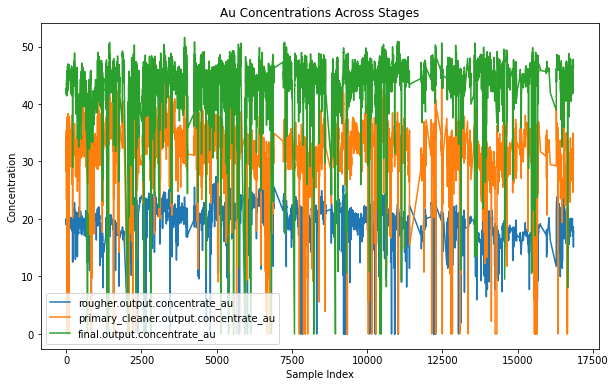

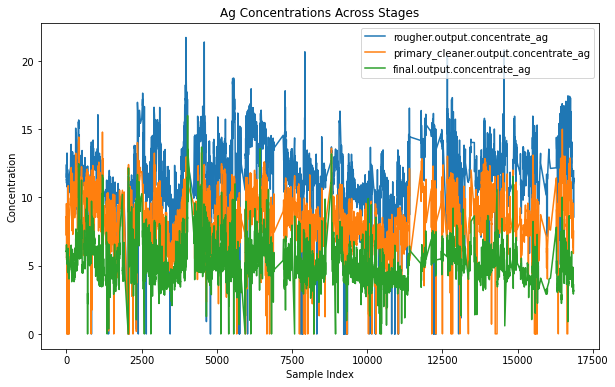

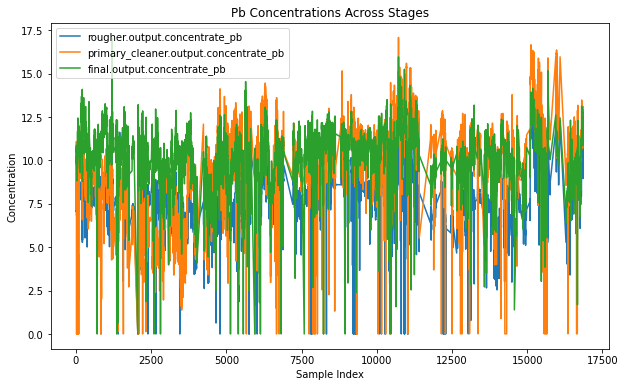

In [14]:
# Define function to plot metal concentrations across stages

def plot_metal_concentrations(data, metal):
    stages = ['rougher.output', 'primary_cleaner.output', 'final.output'] 
    concentrations = [f"{stage}.concentrate_{metal}" for stage in stages]
    
    plt.figure(figsize=(10, 6))
    for concentration in concentrations:
        plt.plot(data[concentration], label=concentration)
    
    plt.title(f"{metal.capitalize()} Concentrations Across Stages")
    plt.xlabel("Sample Index")
    plt.ylabel("Concentration")
    plt.legend()
    plt.show()

# Plot gold (Au) concentrations across stages
plot_metal_concentrations(gold_train, 'au')

# Plot silver (Ag) concentrations across stages
plot_metal_concentrations(gold_train, 'ag')

# Plot lead (Pb) concentrations across stages
plot_metal_concentrations(gold_train, 'pb')

- Gold levels greatly increase after every stage
- Silver levels noticably decrease after every stage
- Lead levels increase from stages rougher to primary cleaner but may also decrease in the final stage

<div class="alert alert-success">
<b>Reviewer's comment</b>

Ok, makes sense!
    
</div>

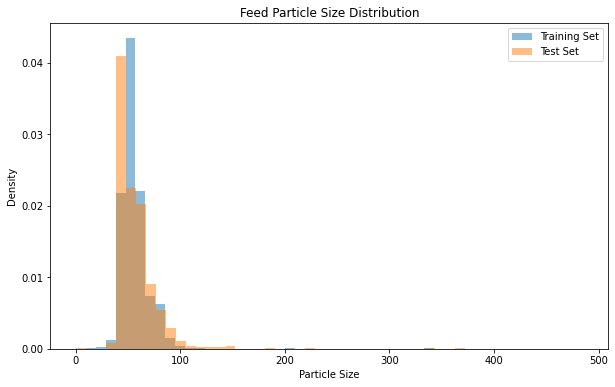

In [15]:
# Plot feed particle size distributions in the training set and test set
plt.figure(figsize=(10, 6))

# Filter out NaN values before plotting
training_feed_size = gold_train_complete['rougher.input.feed_size']
test_feed_size = gold_test_complete['rougher.input.feed_size']

plt.hist(training_feed_size, bins=50, alpha=0.5, label='Training Set', density=True)
plt.hist(test_feed_size, bins=50, alpha=0.5, label='Test Set', density=True)
plt.title("Feed Particle Size Distribution")
plt.xlabel("Particle Size")
plt.ylabel("Density")
plt.legend()
plt.show()

The test distribution is still very similar to the training distribution 👍

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Awesome!
    
</div>

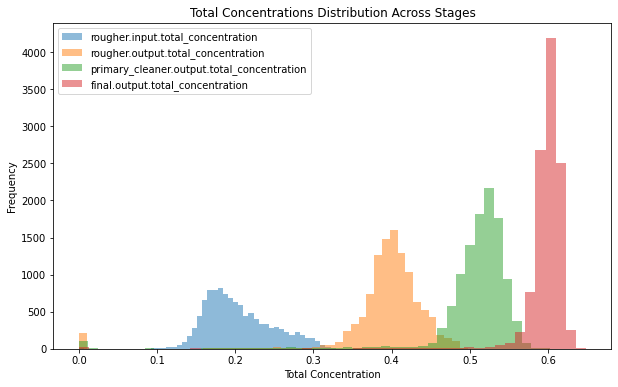

In [16]:
# Define the elements to sum for total concentration
elements_to_sum = ['au', 'ag', 'pb']

# Calculate total concentrations at different stages for the training set
for stage in ['rougher.input', 'rougher.output', 'primary_cleaner.output', 'final.output']:
    total_concentration_column = f'{stage}.total_concentration'
    
    # Define relevant column template based on the stage
    if stage == 'rougher.input':
        column_template = f'{stage}.feed_'
    else:
        column_template = f'{stage}.concentrate_'
    
    # Filter columns containing the specified elements and sum them
    relevant_columns = [col for col in gold_train.columns if (column_template in col and any(element in col.split('.')[-1] for element in elements_to_sum))]
    total_concentration = gold_train[relevant_columns].sum(axis=1)
    
    # Assign the calculated total concentration to a new column
    gold_train[total_concentration_column] = total_concentration / 100  # Convert to percentage

# Plot total concentrations distribution
plt.figure(figsize=(10, 6))
for stage in ['rougher.input.total_concentration', 'rougher.output.total_concentration', 
              'primary_cleaner.output.total_concentration', 'final.output.total_concentration']:
    plt.hist(gold_train[stage], bins=50, alpha=0.5, label=stage)

plt.title("Total Concentrations Distribution Across Stages")
plt.xlabel("Total Concentration")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Graph looks good except for maybe the little chunks of each stage at the origin. 

In [17]:
# Print minimum values for each concentration column
for stage in ['rougher.input.total_concentration', 'rougher.output.total_concentration', 
              'primary_cleaner.output.total_concentration', 'final.output.total_concentration']:
    min_value = gold_train[stage].min()
    print(f"Minimum value in {stage}: {min_value}")

Minimum value in rougher.input.total_concentration: 0.00029999999329447506
Minimum value in rougher.output.total_concentration: 0.0
Minimum value in primary_cleaner.output.total_concentration: 0.0
Minimum value in final.output.total_concentration: 0.0


After looking at how small the outliers are, I think it is worth removing them as it could cause inaccuracies in the machine learning models

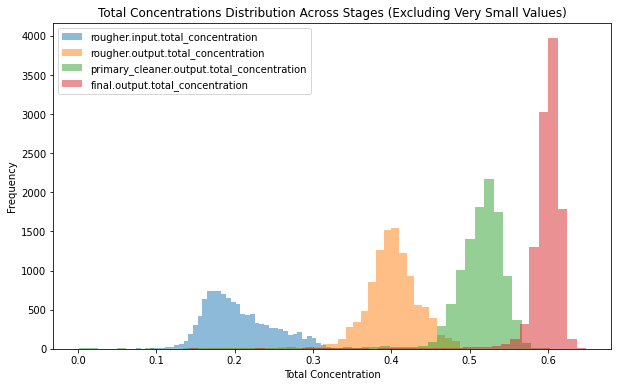

In [18]:
# Plot total concentrations distribution and filter outliers out of gold_train
plt.figure(figsize=(10, 6))

for stage in ['rougher.input.total_concentration', 'rougher.output.total_concentration', 
              'primary_cleaner.output.total_concentration', 'final.output.total_concentration']:
    # Filter out very small values
    filtered_train = gold_train[stage][gold_train[stage] > .0003]
    plt.hist(filtered_train, bins=50, alpha=0.5, label=stage)

plt.title("Total Concentrations Distribution Across Stages (Excluding Very Small Values)")
plt.xlabel("Total Concentration")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [19]:
# Define function to calculate smape
def calculate_smape(y_true, y_pred):
    """
    Function to calculate Symmetric Mean Absolute Percentage Error (sMAPE).

    Parameters:
        y_true (array-like): Array of true target values.
        y_pred (array-like): Array of predicted target values.

    Returns:
        float: sMAPE value.
    """
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0  # Handle division by zero
    smape = np.mean(diff) * 100
    return smape

# Example usage:
# smape_value = calculate_smape(y_true, y_pred)

<div class="alert alert-success">
<b>Reviewer's comment</b>

The function for SMAPE calculation is correct
    
</div>

In [20]:
# Define the linear regression model

linear_reg = LinearRegression()

# Prepare features and target variables
features_train = gold_train_complete.drop(['date', 'final.output.recovery', 'rougher.output.recovery'], axis=1)
target_train = gold_train_complete['final.output.recovery']

# Train the model
linear_reg.fit(features_train, target_train)

# Perform cross-validation
smape_scorer = make_scorer(calculate_smape, greater_is_better=False)  # We want to minimize sMAPE
cv_smape_lr = cross_val_score(linear_reg, features_train, target_train, cv=5, scoring=smape_scorer)

# Calculate mean sMAPE
mean_smape_lr = -cv_smape_lr.mean()

print("Mean sMAPE for Linear Regression:", mean_smape_lr)

Mean sMAPE for Linear Regression: 9.746081106190124


<div class="alert alert-success">
<b>Reviewer's comment</b>

SMAPE scorer was initialized correctly
    
</div>

In [21]:
'''
best_cv_score = float('inf')  # Initialize with a high value to find the minimum
best_est = 0

for est in range(1, 20):
    random_forest = RandomForestRegressor(random_state=12345, n_estimators=est)
    random_forest.fit(features_train, target_train)
    
    # Perform cross-validation
    cv_scores_rf = cross_val_score(random_forest, features_train, target_train, cv=5, scoring=smape_scorer)
    
    # Calculate mean sMAPE
    mean_smape_rf = -cv_scores_rf.mean()
    
    # Compare mean sMAPE score with the best score
    if mean_smape_gb < best_cv_score:
        best_cv_score = mean_smape_rf
        best_est = est

print("Mean cross-validation score of the best model on the validation set (n_estimators = {}): {}".format(best_est, best_cv_score))

# Define the Random Forest Regression model
random_forest = RandomForestRegressor(random_state=12345, n_estimators=100)

# Train the model
random_forest.fit(features_train, target_train)

# Perform cross-validation
cv_smape_rf = cross_val_score(random_forest, features_train, target_train, cv=5, scoring=smape_scorer)

# Calculate mean sMAPE
mean_smape_rf = -cv_smape_rf.mean()

print("Mean sMAPE for Random Forest Regression:", mean_smape_rf)
'''

'\nbest_cv_score = float(\'inf\')  # Initialize with a high value to find the minimum\nbest_est = 0\n\nfor est in range(1, 20):\n    random_forest = RandomForestRegressor(random_state=12345, n_estimators=est)\n    random_forest.fit(features_train, target_train)\n    \n    # Perform cross-validation\n    cv_scores_rf = cross_val_score(random_forest, features_train, target_train, cv=5, scoring=smape_scorer)\n    \n    # Calculate mean sMAPE\n    mean_smape_rf = -cv_scores_rf.mean()\n    \n    # Compare mean sMAPE score with the best score\n    if mean_smape_gb < best_cv_score:\n        best_cv_score = mean_smape_rf\n        best_est = est\n\nprint("Mean cross-validation score of the best model on the validation set (n_estimators = {}): {}".format(best_est, best_cv_score))\n\n# Define the Random Forest Regression model\nrandom_forest = RandomForestRegressor(random_state=12345, n_estimators=100)\n\n# Train the model\nrandom_forest.fit(features_train, target_train)\n\n# Perform cross-valida

Mean sMAPE for Random Forest Regression: 10.564880409506447

This takes a really long time to calculate so I made it a comment to speed things up

<div class="alert alert-success">
<b>Reviewer's comment</b>

Alright!
    
</div>

In [22]:
'''
best_cv_score = float('inf')  # Initialize with a high value to find the minimum
best_est = 0

for est in range(12, 100):
    gradient_boosting = GradientBoostingRegressor(random_state=12345, n_estimators=est)
    gradient_boosting.fit(features_train, target_train)
    
    # Perform cross-validation
    cv_scores_gb = cross_val_score(gradient_boosting, features_train, target_train, cv=5, scoring=smape_scorer)
    
    # Calculate mean sMAPE
    mean_smape_gb = -cv_scores_gb.mean()
    
    # Compare mean sMAPE score with the best score
    if mean_smape_gb < best_cv_score:
        best_cv_score = mean_smape_gb
        best_est = est

print("Mean cross-validation score of the best model on the validation set (n_estimators = {}): {}".format(best_est, best_cv_score))
# Best one I found was n_estimators = 13
# This took an hour to run
'''
# Define the Gradient Boosting Regression model
gradient_boosting = GradientBoostingRegressor(random_state=12345, n_estimators=13)

# Train the model
gradient_boosting.fit(features_train, target_train)

# Perform cross-validation
cv_scores_gb = cross_val_score(gradient_boosting, features_train, target_train, cv=5, scoring=smape_scorer)

# Calculate mean sMAPE
mean_smape_gb = -cv_scores_gb.mean()

print("Mean sMAPE for Gradient Boosting Regression:", mean_smape_gb)


Mean sMAPE for Gradient Boosting Regression: 9.188501131134153


Looks like Gradient Boosting now has the best sMAPE score so that's what I'll be using

In [23]:
# Testing GradientBoosting model with gold_test

# Prepare features and target variables
features_test = gold_test_complete.drop(['date', 'final.output.recovery', 'rougher.output.recovery'], axis=1)
target_test = gold_test_complete['final.output.recovery']

# Make predictions
test_predictions = gradient_boosting.predict(features_test)

In [24]:
# Calculate the final sMAPE for the model

smape_final = calculate_smape(target_test, test_predictions)

print("sMAPE for final.output.recovery on the test set:", smape_final)

sMAPE for final.output.recovery on the test set: 11.800431181407706


In [26]:
# Baseline model: Always predict the mean of the training set targets
dummy_regressor = DummyRegressor(strategy="mean")
dummy_regressor.fit(features_train, target_train)
baseline_predictions = dummy_regressor.predict(features_test)

# Calculate SMAPE for the baseline model
baseline_smape = calculate_smape(target_test, baseline_predictions)
print("SMAPE (Baseline):", baseline_smape)

# Calculate SMAPE for the GradientBoosting model
gb_smape = calculate_smape(target_test, test_predictions)
print("SMAPE (GradientBoosting):", gb_smape)

SMAPE (Baseline): 11.085162131831066
SMAPE (GradientBoosting): 11.800431181407706


# Conclusion:

- The gradient boosting regression model exhibited superior performance compared to alternative models tested, boasting an approximately .6-point advantage over second place in sMAPE.
- Its performance was decreased on the test set, getting a 2.7-point increase in sMAPE.
- The dataset provided posed significant challenges due to extensive missing data, necessitating meticulous handling and imputation strategies throughout the analysis.
- Observations from the concentration trends reveal intriguing patterns: a notable decrease in gold concentration post the initial stage, followed by a relatively stable trend thereafter. Conversely, gold levels demonstrate a consistent increase across successive stages, juxtaposed with a corresponding decrease in silver concentrations.
- Moreover, there appears to be a discernible pattern in lead levels, exhibiting an increase from the rougher to the primary stage, albeit potentially displaying a decline from primary to final stages.